<a href="https://colab.research.google.com/github/weireagan/reaganpython/blob/master/%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [54]:
%tensorflow_version 2. x

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2. x`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 T-shirt/top


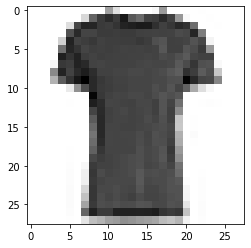

In [62]:
n = 5999
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

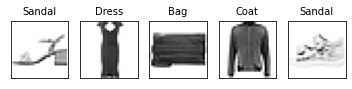

In [63]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys') 

In [0]:
x_train = x_train / 255
x_test = x_test / 255

In [65]:
x_train.shape

(60000, 28, 28)

In [66]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train = x_train.reshape(60000,784)

In [0]:
x_test = x_test.reshape(10000,784)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, 10)

In [0]:
y_test = to_categorical(y_test, 10)

In [72]:
y_train[n]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Dense(80, input_dim = 784, activation = 'relu'))

In [0]:
model.add(Dense(820, activation = 'relu'))

In [0]:
model.add(Dense(10, activation = 'softmax'))

In [0]:
model.compile(loss = 'mse', optimizer = SGD(lr = 0.078), metrics = ['accuracy'])

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                62800     
_________________________________________________________________
dense_4 (Dense)              (None, 820)               66420     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                8210      
Total params: 137,430
Trainable params: 137,430
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.fit(x_train, y_train, batch_size = 100, epochs = 20)

Epoch 1/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0792 - accuracy: 0.3919
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0513 - accuracy: 0.6571
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0405 - accuracy: 0.7107
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0356 - accuracy: 0.7645
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0321 - accuracy: 0.7926
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0297 - accuracy: 0.8064
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0282 - accuracy: 0.8151
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0270 - accuracy: 0.8207
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0262 - accuracy: 0.8254
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0255 - accuracy: 0.8298

In [0]:
result = model.predict_classes(x_test)

神經網路預測:  T-shirt/top


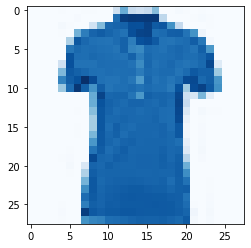

In [100]:
n=4121
print('神經網路預測: ',class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap = 'Blues');

這是 T-shirt/top
神經網路預測是 T-shirt/top


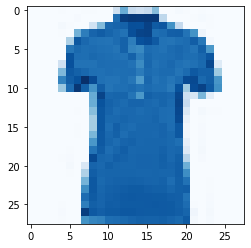

In [99]:
from numpy import argmax
result = model.predict_classes(x_test) 

print('這是', class_names[argmax(y_test[n])])
print('神經網路預測是', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap = 'Blues')